# Espacios de color

Manipulación y cambio de espacio

In [15]:
# Tener PyQt5 instalado para poder usar el backend Qt de matplotlib
#%matplotlib qt

# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt

In [16]:
# Veamos las transformaciones posibles
flags = [i for i in dir(cv) if i.startswith('COLOR_')]
print( flags )

['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGBA', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_BGGR2BGR', 'COLOR_BAYER_BGGR2BGRA', 'COLOR_BAYER_BGGR2BGR_EA', 'COLOR_BAYER_BGGR2BGR_VNG', 'COLOR_BAYER_BGGR2GRAY', 'COLOR_BAYER_BGGR2RGB', 'COLOR_BAYER_BGGR2RGBA', 'COLOR_BAYER_BGGR2RGB_EA', 'COLOR_BAYER_BGGR2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGRA', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGBA', 'COLOR_BAYER_GB2RGB_EA', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GBRG2BGR', 'COLOR_BAYER_GBRG2BGRA', 'COLOR_BAYER_GBRG2BGR_EA', 'COLOR_BAYER_GBRG2BGR_VNG', 'COLOR_BAYER_GBRG2GRAY', 'COLOR_BAYER_GBRG2RGB', 'COLOR_BAYER_GBRG2RGBA', 'COLOR_BAYER_GBRG2RGB_EA', 'COLOR_BAYER_GBRG2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGRA', 'COLOR_BAYER_GR2BGR_EA', 'COLOR_BAYER_GR2BGR_VNG', 'COLOR_

### Ejercicio: Separar la mesa (color verde) del resto de la escena

![image](imgBloque1.bmp)

Primera parte: encontrar un espacio de color conveniente para la discriminación

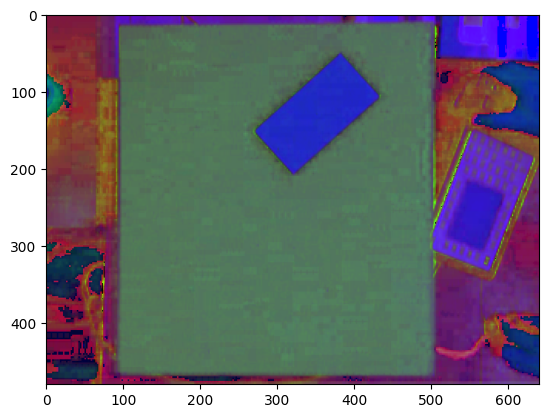

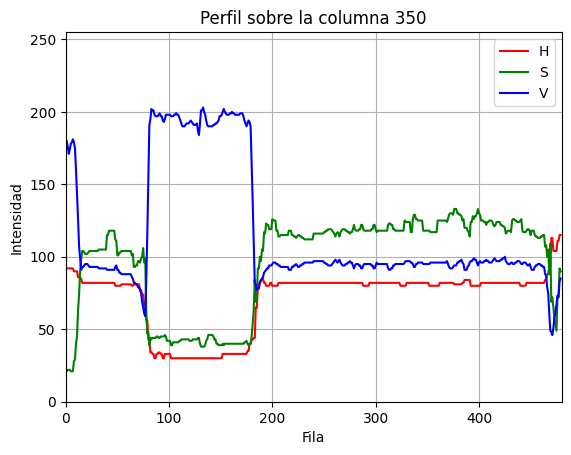

In [17]:
img_color = cv.imread('imgBloque1.bmp')

# Convertir la imagen a HSV
imgHSV = cv.cvtColor(img_color, cv.COLOR_BGR2HSV)
plt.figure()
plt.imshow(imgHSV)
plt.show()

# Graficar los perfiles de intensidad de cada canal
plt.figure()
idx_col = 350
perfil_color = imgHSV[:, idx_col]
plt.plot(perfil_color[:,0], color='r',label='H')
plt.plot(perfil_color[:,1], color='g',label='S')
plt.plot(perfil_color[:,2], color='b',label='V')
plt.xlabel('Fila')
plt.ylabel('Intensidad')
plt.title('Perfil sobre la columna {}'.format(idx_col))
plt.grid()
plt.xlim(0,480)
plt.ylim(0,255)
plt.legend()
plt.show()


En el perfil vemos que difiere de RGB porque estamos en otro espacio de color.<br>
Respecto a la imagen en HSV, que si bien al graficar no dice mucho, la componente de Hue para la mesa oscila alrededor de 80.

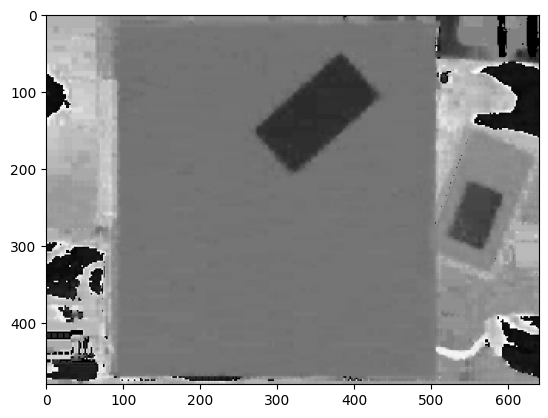

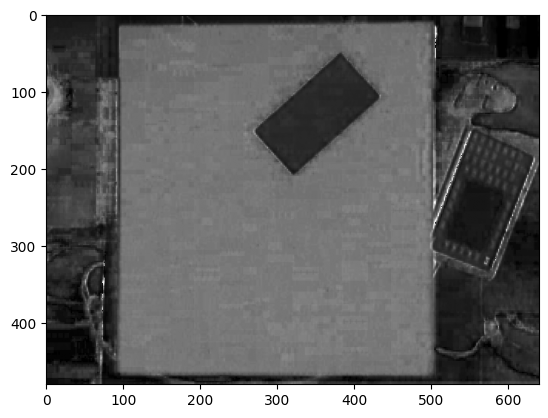

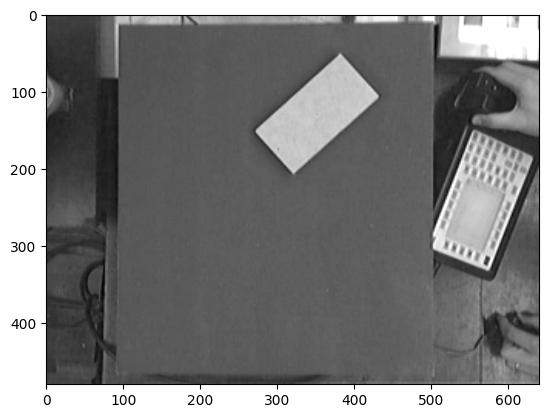

In [18]:
im_h, im_s, im_v = cv.split(imgHSV)
plt.figure()
# La curva de Hue, discrimina fácilmente el color del tablero de los colores del fondo
plt.imshow(im_h, cmap='gray')
plt.show()
plt.figure()
# Puedo complementar con la curva de saturación, ya que ambas son muy uniformes sobre el tablero
plt.imshow(im_s,cmap='gray')
plt.show()
plt.figure()
# La imagen de intensidad (V) permite discriminar fácilmente el bloque del tablero, pero confunde el tablero con el fondo
plt.imshow(im_v,cmap='gray')
plt.show()

Hacemos un recorte de la imagen y sobre eso una descripcion estadistica:

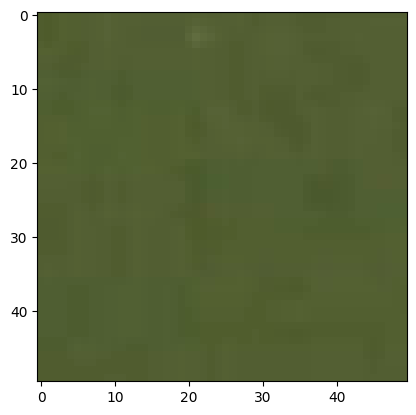

In [19]:
muestra = imgHSV[300:350, 300:350, :]

color_h_medio, _, _ = np.mean(muestra, axis=(0,1))

muestra = cv.cvtColor(muestra, cv.COLOR_HSV2BGR)
#muestra = cv.cvtColor(muestra, cv.COLOR_BGR2GRAY)
plt.figure()
plt.imshow(muestra)
plt.show()

In [20]:
color_h_medio

np.float64(81.472)

Ahora para segmentar, seleccionamos los pixeles (mascara) según una condición:

hue medio:81.472


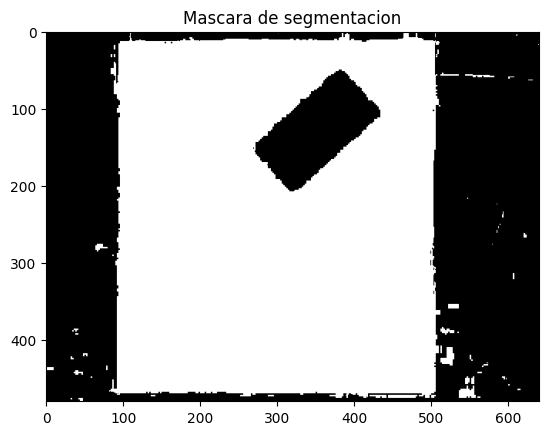

In [21]:
print(f'hue medio:{color_h_medio}')

# Rango de la mascara +-10 respecto a la media
color_l = (color_h_medio-10, 10, 10)
color_u = (color_h_medio+10, 150, 150)

mask = cv.inRange(imgHSV, color_l,  color_u)

plt.imshow(mask, cmap='gray')
plt.title('Mascara de segmentacion')
plt.show()


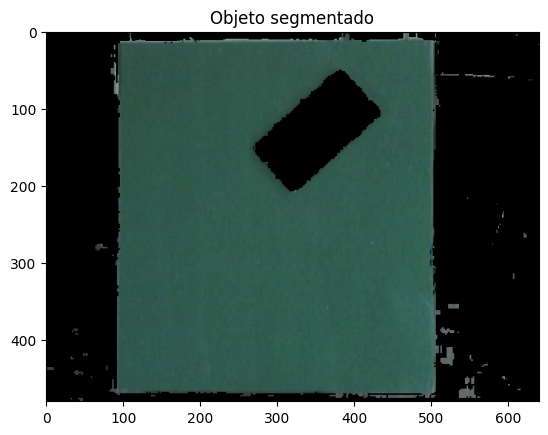

In [22]:
img_segmentada = cv.bitwise_and(img_color, img_color, mask=mask)
plt.imshow(img_segmentada[:,:,::-1])
plt.title('Objeto segmentado')
plt.show()

Con esta operacion básica, en el espacio HSV, se pudo lograr una segmentación.